In [19]:
import pandas as pd
import networkx as nx
import matplotlib . pyplot as plt
import gurobipy as gp

Let $G = (V,E,s)$ be a signed graph and $k$ a positive scalar satisfying $k \in \{1, \ldots, n\}$.

We assume that a signed graph has no parallel edges.

An edge $e \in E$ is called negative if $s(e) = −1$ and positive if $s(e) = +1$. 

Let $E^{-}$ and $E^{+}$ denote, respectively, the sets of negative and positive edges in a signed graph. 

For a vertex set $S \subseteq V$ , let $E[S] = \{ (i,j) \in E \ | \ i, j \in S \}$ denote the subset of edges induced by $S$.

A signed graph $G$ is balanced if its vertex set can be partitioned into sets $W$ (possibly empty) and $V \setminus W$ in such a way that $E[W] \cup E[V \setminus W] = E^{+}$.

Let $k$ be a given parameter satisfying $k \in \{1, \ldots, n \}$. 
A signed graph $G$ is $k$-balanced if its vertex set $V$ can be partitioned into sets $N_1, N_2, \ldots, N_l$, with $l \leq k$, in such a way that $\cup_{1 \leq i \leq l} E [N_i ] = E^{+}$. 
Such a partition is called a $l$-partition.

**Definition (k-MBS Problem):**

Let $G = (V,E,s)$ be a signed graph and $k$ be a scalar value satisfying $k \in \{ 1, \ldots, n\}$. 

The maximum $k$-balanced subgraph problem is the problem of finding an induced subgraph $H = (V',E[V'],s)$ of $G$ such that $H$ is
$k$-balanced and maximizes the cardinality of the vertex set $V'$.

Let us denote this maximal value by $v(G,k)$.

Let $G = (V,E)$ be an undirected graph.

For a vertex set $S \subset V$ , we define $N(S) = \{j \in V \quad | \quad (i, j) \in E , i \in S \}$. 

A set $K \subseteq V$ is a clique in $G$ if each pair of vertices $i,j \in K$ is joined by an edge $(i,j) \in E$.

A set $I \subseteq V$ is a stable set in $G$ if no pair of vertices $i,j \in I$ is joined by an edge in $E$;
i.e. $(i, j) \notin E$. 
Let $\alpha(G)$ denote the cardinality of a maximum stable set in $G$. 

We represent a cycle by its vertex set $C \subseteq V$ . 
A hole is a chordless cycle of length at least four. 
An odd hole is a hole with an odd number of vertices. 

Definitions and notations for an undirected graph $G=(V,E)$ also apply to the signed graph $G=(V,E,s)$. 

We define $G^{-}=(V,E^{-})$ and $G^{+}=(V,E^{+})$.

For a vertex set $S \subseteq V$, we define 
$N^{−}(S) = \{j \in V \ | \ (i,j) \in E^{-} , i \in S \}$, 
$N^{+}(S) = \{j \in V \ | \ (i,j) \in E^{+} , i \in S \}$ and 
$\overline{N}^{-}(S) = V \setminus (N^{-}(S) \cup S)$. 

A set $K \subseteq V$ is called a negative (positive) clique if each pair of vertices in $K$ is joined by a negative (positive) edge. 

A positive (negative) hole is a hole with only positive (negative) edges.

We define the arc sets $A = \{(i,j) \ | \ i \in V, \ j \in \overline{N}^{-} (\{ i \}), i < j \}$ and $A^{0} = A \cup \{(i, i) \ | \ i \in V \}$. 

An arc $(i,j) \in A^{0}$ indicates that vertex $i$ can represent vertex $j$, or equivalently that vertex $j$ can be represented by vertex $i$. 

Let $D(i) = \{j \in V \ | \ (i, j) \in A^{0} \}$ denote the set of all vertices that can be represented by $i$ and let $O(j) = \{i \in V \ | \ (i, j) \in A^{0} \}$ denote the set of all vertices that can represent $j$. 
Additionally, let $S_{i}$ denote a vertex set such that: $S_{i} \subseteq D(i)$ and $i \in S_{i}$. 
We say that $i$ is the representative vertex of $S_{i}$.

A feasible solution in our formulation defines a $k$-balanced subgraph of G.

Let $n=|V|$ and $m=|A|$. 

To describe this feasible set, we use binary decision variables $x \in \{0, 1\}^{n+m}$ that define a $l$-partition, $l \leq k$, of a $k$-balanced subgraph. 

For each vertex $i \in V$, $x_{i}^{i} = 1$ if $i$ is a representative vertex, i.e., $j$ belongs to a set $S_i$ belongs in the $l$-partition, 0 otherwise.

For each arc $(i, j) \in A$, we define $x_j = 1$ if vertex $j$ is represented by vertex, i.e., $j$ belongs to a set $S_{i}$ in $l$-partition, 0, otherwise.

$$
\begin{align}
\max \ & \sum_{(i,j) \in A^{0}} x_{j}^{i} \\
& \sum_{i \in O(j)} x_{i}^{j} \leq 1, \ \forall j \in V \\
& \sum_{i \in V} x_{i}^{i} \leq k, \\
& x_{i}^{j} \leq x_{i}^{i}, \ \forall (i,j) \in A, \\
& x_{i}^{p} + x_{j}^{p} \leq x_{p}^{p}, \ \forall (i,j) \in E^{-}, \ \forall p \in O(i) \cup O(j), \\
& x_{i}^{p} + x_{j}^{p} \leq 1, \ \forall (i,j) \in E^{+}, \ \forall p \in O(i), \ \forall q \in O(i) \cup O(j) \setminus \{ p \}, \\
& x_{i}^{i} \in \{ 0,1 \}, \ \forall i \in V, \\
& x_{i}^{j} \in \{ 0,1 \}, \ \forall (i,j) \in A.
\end{align}
$$

**Lemma**:(Strengthened Positive-Edge Inequality). 

Consider a positive edge $(i,j) \in E^{+}$ . 

Let $S \subseteq O(i)$ be a subset of candidates to represent vertex $i$.

The inequality
$$
\sum_{p \in S} x_{i}^{p} + \sum_{p \in O(j)\setminus S} x_{j}^{p} \leq 1, \ \forall (i,j) \in E^{+}, \ \forall p \in O(i), \ \forall q \in O(i) \cup O(j) \setminus \{ p \}
$$
is valid for $P_{G,k}$ and dominates the 

$$
x_{i}^{p} + x_{j}^{p} \leq 1, \ \forall (i,j) \in E^{+}, \ \forall p \in O(i), \ \forall q \in O(i) \cup O(j) \setminus \{ p \}
$$



In [89]:
#random_n60_k2_pos30_neg5_err5_3.g
#random_n60_k5_pos30_neg5_err5_1.g
#random_n60_k5_pos30_neg5_err5_5.g
#random_n60_k5_pos30_neg5_err10_1.g
#random_n60_k5_pos30_neg5_err10_2.g
#random_n60_k5_pos30_neg5_err10_3.g
#random_n60_k5_pos30_neg5_err20_1.g

instance = f"../data/kmbs/instances/RANDOM/random_n60_k2_pos30_neg5_err5_1.g"

with open(instance, 'r') as file: 
    lines = file.readlines()

lines = [a.strip() for a in lines]

values = lines[0].split()
n, m = int(values[0]), int(values[1])

print("n =", n)
print("m =", m)

n = 60
m = 311


In [90]:
G = nx.Graph()

In [91]:
for k in range(n):
    G.add_node(k)

In [92]:
for e in range(1,m+1):   
    values = lines[e].split()
    i, j, val = int(values[0]), int(values[1]), int(values[2])
    G.add_edge(i, j, weight=val)

In [93]:
print(G.number_of_nodes())
print(G.number_of_edges())

60
311


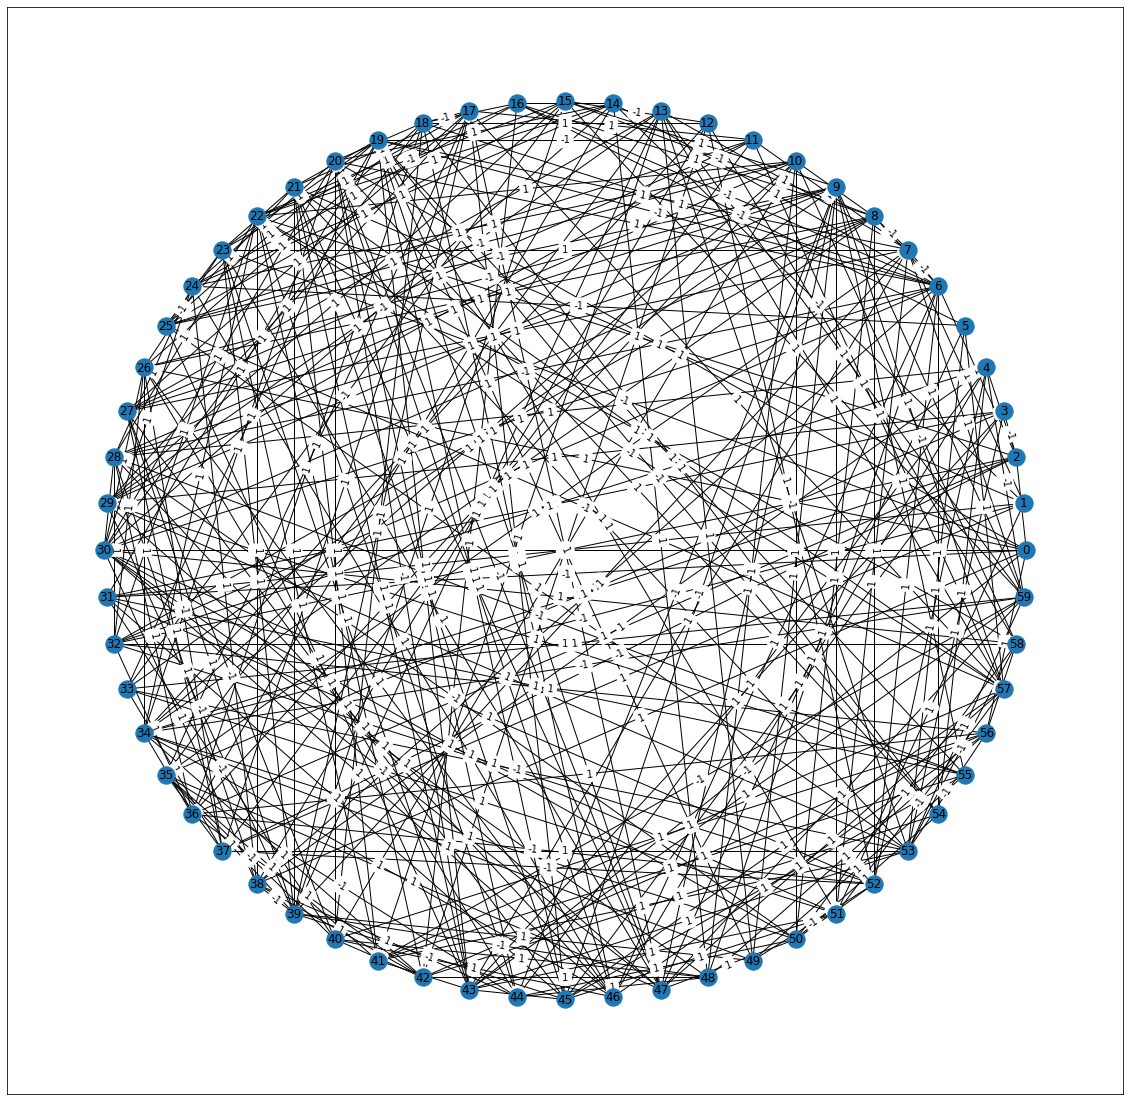

In [94]:
plt.figure(figsize=(20, 20))
#pos=nx.spring_layout(G)
#pos=nx.random_layout(G)
pos=nx.circular_layout(G)
#pos=nx.planar_layout(G)
nx.draw_networkx(G,pos,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [95]:
EP = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
EN = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0]

In [96]:
print(len(EP),len(EN))

251 60


In [97]:
H = G.edge_subgraph(EP)
#list(H.edges)
#list(H.nodes)

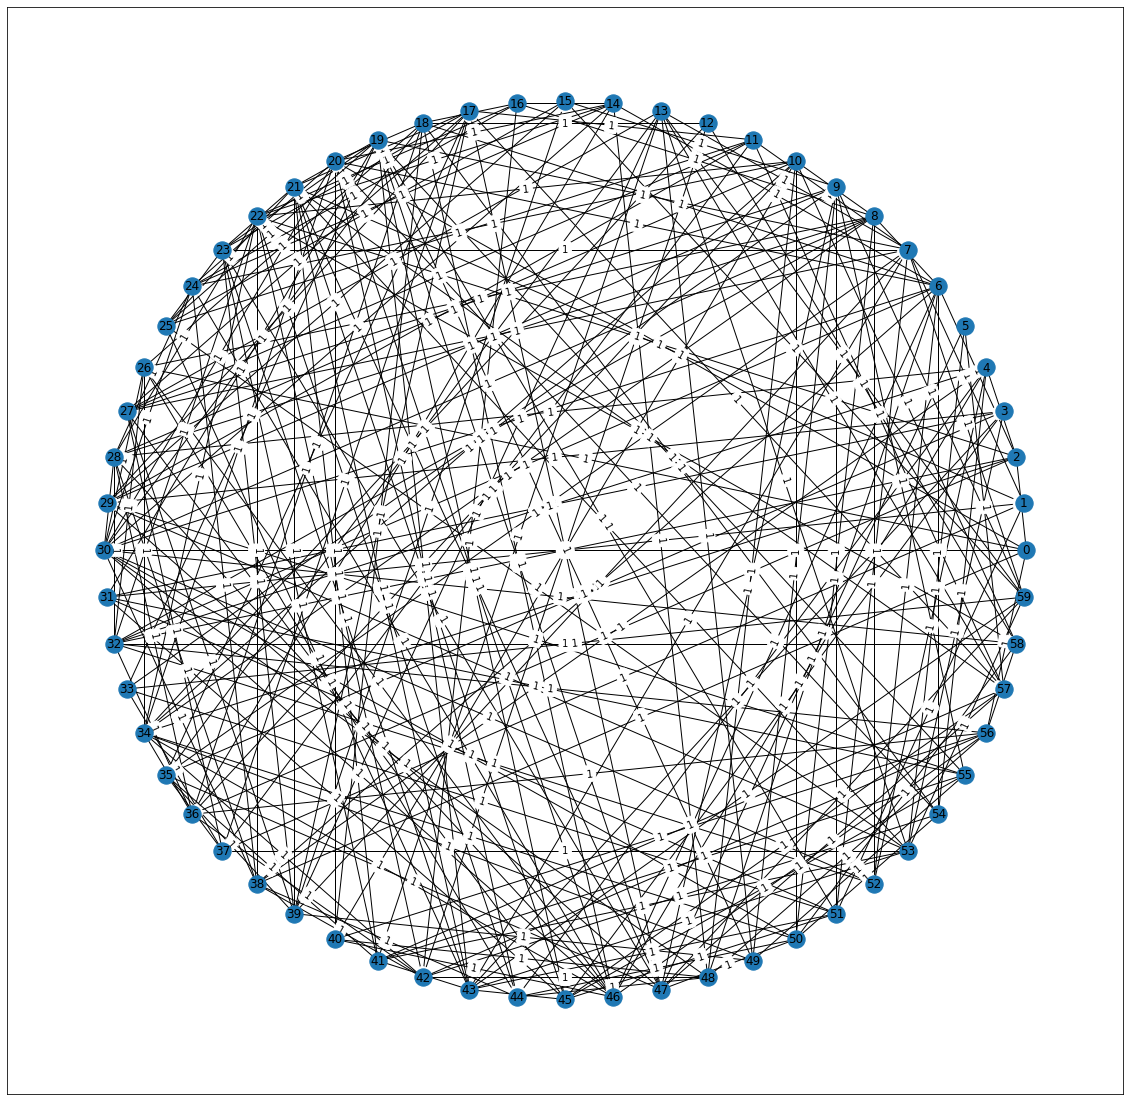

In [98]:
plt.figure(figsize=(20, 20))
pos=nx.circular_layout(H)
nx.draw_networkx(H,pos,with_labels=True)
labels = nx.get_edge_attributes(H,'weight')
nx.draw_networkx_edge_labels(H,pos,edge_labels=labels)
plt.show()

In [99]:
NeighbM = []
NeighbP = []

In [100]:
nodes = G.nodes()

A = []
for i in nodes:
    #print(i, ": ", end="")
    neighbors = G.neighbors(i)
    lst = []
    for j in neighbors:
        if G[i][j]["weight"] < 0:
            lst.append(j)
    lst.append(i)
    lstCoV =  list(set(nodes) - set(lst))
    for j in lstCoV:
        if (i<j):
            a = (i,j)
            A.append(a)

print(A)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (2, 4), 

In [101]:
A0 = A
for i in nodes:
    a = (i,i)
    A0.append(a)

print(A0)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (2, 4), 

In [102]:
D = []
for i in nodes:
    lst = []
    for j in nodes:
        if (i,j) in A0:
            lst.append(j)
    D.append(lst)

print(D)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3

In [103]:
O = []
for j in nodes:
    lst = []
    for i in nodes:
        if (i,j) in A0:
            lst.append(i)
    O.append(lst)

print(O)

[[0], [0, 1], [0, 1, 2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 7], [0, 1, 2, 3, 4, 5, 6, 8], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15], [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18], [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21

## MIP formulation

In [118]:
method = "mip"

#model
model = gp.Model()

# silent/verbose mode
model.Params.OutputFlag = 0

# variables
if method == "mip":
    x = model.addVars(A0,vtype=gp.GRB.BINARY, name="x")
else:
    x = model.addVars(A0,lb=0.0,ub=1.0,vtype=gp.GRB.CONTINUOUS,name="x")

In [119]:
#objective function
obj = 0
for e in A0:
    obj += 1*x[e]
         
model.setObjective(obj, gp.GRB.MAXIMIZE)

In [125]:
# constraints
 
for j in nodes:
    constr = 0
    for i in O[j]:
        constr += x[(i,j)] 
    model.addConstr(constr <= 1.0, "constr2")

constr = 0
for i in nodes:
    constr += x[(i,i)] 
model.addConstr(constr <= 2.0, "constr3")

for e in A:
    model.addConstr(x[(e[0],e[1])] <= x[(e[0],e[0])], "constr4")

for e in EN:
    for p in O[e[0]]:
        if p in O[e[1]]:
            model.addConstr(x[(p,e[0])] + x[(p,e[1])] <= x[(p,p)], "constr5")

#for e in EP:
#    for p in O[e[0]]:
#        M = list(set(O[e[1]]) - {p})
#        for q in M:
#            model.addConstr(x[(p,e[0])] + x[(q,e[1])] <= 1.0, "constr6")

for e in EP:
    S = O[e[0]]
    M = O[e[1]]
    constr0 = 0
    for p in S:
        constr0 += x[(p,e[0])]
    constr1 = 0
    for p in list(set(M) - set(S)):
        constr1 += x[(p,e[1])]
    model.addConstr(constr0 + constr1 <= 1.0, "constr9")

In [126]:
#relax = model.relax()

if method != "mip":
    for v in model.getVars():
        v.setAttr('vtype', 'C')

In [127]:
model.optimize()
        
tmp = 0
if model.status == gp.GRB.OPTIMAL:
    tmp = 1
 
objval = model.objVal
runtime = model.Runtime
status = tmp
if method == "mip":
    objbound = model.objBound
    mipgap = model.MIPGap
    nodecount = model.NodeCount


In [128]:
print("ub = ", objval)
print("time = ", runtime)
print("status = ", status)
if method == "mip":
   print("lb = ", objbound)
   print("gap = ", mipgap)
   print("nodes = ", nodecount)

ub =  56.39999999999994
time =  0.9687709808349609
status =  1


In [124]:
print("ub = ", objval)
print("time = ", runtime)
print("status = ", status)
if method == "mip":
   print("lb = ", objbound)
   print("gap = ", mipgap)
   print("nodes = ", nodecount)


ub =  56.0
time =  0.11134481430053711
status =  1
